<h1>
    Sommaire<span class="tocSkip"></span>
</h1>
<br>
<div class="toc">
    <ul class="toc-item">
        <li>
            <span>
                <a href="#Import-des-librairies-et-chargement-des-données" data-toc-modified-id="Import-des-librairies-et-chargement-des-données-1">
                    <span class="toc-item-num">1&nbsp;&nbsp;</span>Import des librairies et chargement des données
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Exploration-des-données" data-toc-modified-id="Exploration-des-données-2">
                    <span class="toc-item-num">2&nbsp;&nbsp;</span>Exploration des données
                </a>
            </span>
            <ul class="toc-item">
                <li>
                    <span>
                        <a href="#Exploration-des-tables-de-la-BDD" data-toc-modified-id="Exploration-des-tables-de-la-BDD-2.1">
                            <span class="toc-item-num">2.1&nbsp;&nbsp;</span>Exploration des tables de la BDD
                        </a>
                    </span>
                </li>
                <li>
                    <span>
                        <a href="#Construction-du-dataset" data-toc-modified-id="Construction-du-dataset-2.2">
                            <span class="toc-item-num">2.2&nbsp;&nbsp;</span>Construction du dataset
                        </a>
                    </span>
                    <ul>
                        <li>
                            <span>
                                <a href="#Jointures-des-différentes-tables-de-la-BDD" data-toc-modified-id="Jointures-des-différentes-tables-de-la-BDD-2.1.1">
                                    <span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Jointures des différentes tables de la BDD
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#Filtre-et-ajout-de-donnée" data-toc-modified-id="Filtre-et-ajout-de-donnée-2.1.2">
                                    <span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Filtre et ajout de donnée
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#Aggrégation-des-données-niveau-client" data-toc-modified-id="Aggrégation-des-données-niveau-client-2.1.3">
                                    <span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Aggrégation des données niveau client
                                </a>
                            </span>
                        </li>
                    </ul>
                </li>
                <li>
                    <span>
                        <a href="#Analyse-du-dataset" data-toc-modified-id="Analyse-du-dataset-2.3">
                            <span class="toc-item-num">2.3&nbsp;&nbsp;</span>Analyse du dataset
                        </a>
                    </span>
                </li>
            </ul>
        </li>
        <li>
            <span>
                <a href="#Spatial-coverage" data-toc-modified-id="Spatial-coverage-3">
                    <span class="toc-item-num">3&nbsp;&nbsp;</span>Spatial coverage
                </a>
            </span>
            <ul class="toc-item">
                <li>
                    <span>
                        <a href="#Locations-without-ISO-code" data-toc-modified-id="Locations-without-ISO-code-3.1">
                            <span class="toc-item-num">3.1&nbsp;&nbsp;</span>Locations without ISO code
                        </a>
                    </span>
                </li>
                <li>
                    <span>
                        <a href="#ISO-country-codes" data-toc-modified-id="ISO-country-codes-3.2">
                            <span class="toc-item-num">3.2&nbsp;&nbsp;</span>ISO country codes
                        </a>
                    </span>
                </li>
            </ul>
        </li>
        <li>
            <span>
                <a href="#Temporal-coverage" data-toc-modified-id="Temporal-coverage-4">
                    <span class="toc-item-num">4&nbsp;&nbsp;</span>Temporal coverage
                </a>
            </span>
            <ul class="toc-item">
                <li>
                    <span>
                        <a href="#Temporal-coverage-per-type-of-CO2-emissions" data-toc-modified-id="Temporal-coverage-per-type-of-CO2-emissions-4.1">
                            <span class="toc-item-num">4.1&nbsp;&nbsp;</span>Temporal coverage per type of CO2 emissions
                        </a>
                    </span>
                </li>
                <li>
                    <span>
                        <a href="#Temporal-coverage-per-country" data-toc-modified-id="Temporal-coverage-per-country-4.2">
                            <span class="toc-item-num">4.2&nbsp;&nbsp;</span>Temporal coverage per country
                        </a>
                    </span>
                </li>
            </ul>
        </li>
        <li>
            <span>
                <a href="#Descriptive-statistics" data-toc-modified-id="Descriptive-statistics-5">
                    <span class="toc-item-num">5&nbsp;&nbsp;</span>Descriptive statistics
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Sectors" data-toc-modified-id="Sectors-6">
                    <span class="toc-item-num">6&nbsp;&nbsp;</span>Sectors
                </a>
            </span>
            <ul class="toc-item">
                <li>
                    <span>
                        <a href="#Production-based,-trade-related,-production-of-cement..." data-toc-modified-id="Production-based,-trade-related,-production-of-cement...-6.1">
                            <span class="toc-item-num">6.1&nbsp;&nbsp;</span>Production-based, trade-related, production of cement...
                        </a>
                    </span>
                </li>
            </ul>
        </li>
    </ul>
</div>

# Import des librairies et chargement des données

In [1]:
import os

# grammaire abstraite de l'arbre syntaxique de Python
import ast

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.api.types import is_string_dtype, is_numeric_dtype

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# mise en place des chemins des fichiers contenant les datasets
dossier_data = "data/"
nom_fichier_clients = "olist_customers_dataset.csv"
nom_fichier_geolocalisation = "olist_geolocation_dataset.csv"
nom_fichier_produits_commandes = "olist_order_items_dataset.csv"
nom_fichier_paiements_commandes = "olist_order_payments_dataset.csv"
nom_fichier_commentaires_commandes = "olist_order_reviews_dataset.csv"
nom_fichier_commandes = "olist_orders_dataset.csv"
nom_fichier_produits = "olist_products_dataset.csv"
nom_fichier_vendeurs = "olist_sellers_dataset.csv"
nom_fichier_categorie_produit = "product_category_name_translation.csv"

In [3]:
# chargement des datasets (BDD complète)
clients = pd.read_csv(dossier_data + nom_fichier_clients)
geolocalisation = pd.read_csv(dossier_data + nom_fichier_geolocalisation)
produits_commandes = pd.read_csv(dossier_data + nom_fichier_produits_commandes)
paiements_commandes = pd.read_csv(dossier_data + nom_fichier_paiements_commandes)
commentaires_commandes = pd.read_csv(dossier_data + nom_fichier_commentaires_commandes)
commandes = pd.read_csv(dossier_data + nom_fichier_commandes)
produits = pd.read_csv(dossier_data + nom_fichier_produits)
vendeurs = pd.read_csv(dossier_data + nom_fichier_vendeurs)
categorie_produit = pd.read_csv(dossier_data + nom_fichier_categorie_produit)

# Exploration des données

In [4]:
noms_datasets = ["clients", "geolocalisation", "produits_commandes", "paiements_commandes", "commentaires_commandes", 
                 "commandes", "produits", "vendeurs", "categorie_produit"]

for dataset in noms_datasets:
    print("Le dataset {} a la forme suivante : {}.".format(dataset, eval(dataset).shape))

Le dataset clients a la forme suivante : (99441, 5).
Le dataset geolocalisation a la forme suivante : (1000163, 5).
Le dataset produits_commandes a la forme suivante : (112650, 7).
Le dataset paiements_commandes a la forme suivante : (103886, 5).
Le dataset commentaires_commandes a la forme suivante : (100000, 7).
Le dataset commandes a la forme suivante : (99441, 8).
Le dataset produits a la forme suivante : (32951, 9).
Le dataset vendeurs a la forme suivante : (3095, 4).
Le dataset categorie_produit a la forme suivante : (71, 2).


In [5]:
# fonctions
def compter_donnees_manquantes(dataset):
    """Retourne un DataFrame contenant la liste des variables avec leurs nombre et pourcentage respectifs 
    de données manquantes. Ne retourne rien s'il n'y a aucune donnée manquante.
    
    Paramètres
    ----------
    dataset : DataFrame
        Dataset sur lequel on compte le nombre et le pourcentage de données manquantes par variable.
        
    """
    
    nombres_donnees_manquantes = dataset.isnull().sum()
    nombres_donnees_totales = dataset.isnull().count()
    pourcentages_donnees_manquantes = round(nombres_donnees_manquantes/nombres_donnees_totales*100, 1)

    donnees_manquantes_df = pd.DataFrame({'nombre': nombres_donnees_manquantes, 
                                      'total': nombres_donnees_totales, 
                                      'pourcentage': pourcentages_donnees_manquantes})

    donnees_manquantes_df.sort_values(by=['nombre'], ascending=False, inplace=True)
    donnees_manquantes_df = donnees_manquantes_df[donnees_manquantes_df['nombre'] > 0]

    if len(donnees_manquantes_df) != 0:
        return donnees_manquantes_df
    else:
        return None

## Exploration des tables de la BDD

### Table clients

In [6]:
clients.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Le *customer_id* permet de faire le lien entre la commande et le client. À chaque commande, un unique *customer_id* est assigné au client. Un même client peut donc avoir plusieurs *customer_id* s'il a fait plusieurs commandes mais il est identifié grâce au *customer_unique_id*.

In [7]:
compter_donnees_manquantes(clients)

Pas de donnée manquante dans cette table.

In [8]:
clients.customer_city.value_counts()[:10]

sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: customer_city, dtype: int64

In [9]:
clients.customer_state.value_counts()

SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_state, dtype: int64

La plupart des clients viennent de l'état et de la ville de Sao Paulo puis vient ensuite Rio de Janeiro. Ce sont donc principalement des clients urbains provenant de grandes agglomérations.

### Table géolocalisation

In [10]:
geolocalisation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [11]:
compter_donnees_manquantes(geolocalisation)

Pas de donnée manquante dans cette table.

In [12]:
geolocalisation.geolocation_city.value_counts()[:10]

sao paulo                135800
rio de janeiro            62151
belo horizonte            27805
são paulo                 24918
curitiba                  16593
porto alegre              13521
salvador                  11865
guarulhos                 11340
brasilia                  10470
sao bernardo do campo      8112
Name: geolocation_city, dtype: int64

In [13]:
geolocalisation.geolocation_state.value_counts()

SP    404268
MG    126336
RJ    121169
RS     61851
PR     57859
SC     38328
BA     36045
GO     20139
ES     16748
PE     16432
DF     12986
MT     12031
CE     11674
PA     10853
MS     10431
MA      7853
PB      5538
RN      5041
PI      4549
AL      4183
TO      3576
SE      3563
RO      3478
AM      2432
AC      1301
AP       853
RR       646
Name: geolocation_state, dtype: int64

### Table commandes

In [14]:
commandes.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [15]:
compter_donnees_manquantes(commandes)

,nombre,total,pourcentage
order_delivered_customer_date,2965,99441,3.0
order_delivered_carrier_date,1783,99441,1.8
order_approved_at,160,99441,0.2


Il existe des données manquantes pour 3 variables concernant des dates :
- la date de livraison au client
- la date de livraison chez le transporteur
- et la date à laquelle la commande a été approuvée

Etudions le statut des commandes pour lesquelles des données sont manquantes.

In [16]:
# conserver que les lignes ayant des données manquantes
commandes_avec_dates_manquantes = commandes[commandes.isna().any(axis=1)]
commandes_avec_dates_manquantes.order_status.value_counts()

shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered        23
created           5
approved          2
Name: order_status, dtype: int64

Parmi toutes les commandes qui ont des dates manquantes, seules 23 d'entre elles ont bien été livrées au client. Vérifions alors quel(s) champ(s) sont manquants pour ces commandes.

In [17]:
compter_donnees_manquantes(commandes_avec_dates_manquantes[commandes_avec_dates_manquantes.order_status == "delivered"])

,nombre,total,pourcentage
order_approved_at,14,23,60.9
order_delivered_customer_date,8,23,34.8
order_delivered_carrier_date,2,23,8.7


Revenons au dataset principal.

In [18]:
commandes.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

### Table des produits commandés

In [19]:
produits_commandes.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Le prix total de la commande est la somme de *price* et *freight_value*.

In [20]:
compter_donnees_manquantes(produits_commandes)

Pas de données manquantes dans cette table.

In [197]:
produits_commandes.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


### Table produits

In [21]:
produits.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Pour la segmentation, la seule donnée intéressante est la catégorie du produit.

In [22]:
compter_donnees_manquantes(produits)

,nombre,total,pourcentage
product_category_name,610,32951,1.9
product_name_lenght,610,32951,1.9
product_description_lenght,610,32951,1.9
product_photos_qty,610,32951,1.9
product_weight_g,2,32951,0.0
product_length_cm,2,32951,0.0
product_height_cm,2,32951,0.0
product_width_cm,2,32951,0.0


In [56]:
produits.product_category_name.value_counts()[20:]

malas_acessorios                                  349
consoles_games                                    317
moveis_escritorio                                 309
instrumentos_musicais                             289
eletroportateis                                   231
casa_construcao                                   225
livros_interesse_geral                            216
fashion_calcados                                  173
moveis_sala                                       156
climatizacao                                      124
livros_tecnicos                                   123
telefonia_fixa                                    116
casa_conforto                                     111
market_place                                      104
alimentos_bebidas                                 104
fashion_roupa_masculina                            95
moveis_cozinha_area_de_servico_jantar_e_jardim     94
sinalizacao_e_seguranca                            93
construcao_ferramentas_segur

### Table de traduction des catégories de produits

In [23]:
categorie_produit.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


Cette table est en fait une table de traduction entre le nom de catégorie qui est initialement en portugais vers l'anglais.

In [24]:
compter_donnees_manquantes(categorie_produit)

Pas de données manquantes dans cette table.

### Table vendeurs

In [25]:
vendeurs.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [26]:
vendeurs.seller_city.value_counts()[:10]

sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: seller_city, dtype: int64

In [27]:
vendeurs.seller_state.value_counts()

SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AM       1
PA       1
AC       1
PI       1
MA       1
Name: seller_state, dtype: int64

La majeure partie des vendeurs se trouvent sur Sao Paulo.

In [28]:
compter_donnees_manquantes(vendeurs)

Pas de données manquantes dans cette table.

### Table paiement commandes

In [29]:
paiements_commandes.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [30]:
paiements_commandes.payment_type.value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

La majeure partie des commandes est payée par carte de crédit, puis par *boleto*.

In [31]:
compter_donnees_manquantes(paiements_commandes)

Pas de données manquantes dans cette table.

In [57]:
paiements_commandes.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


### Table commentaires commandes

In [32]:
commentaires_commandes.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Le score donné par le client serait une donnée intéressante à exploiter. Il est compris entre 1 et 5 et un score de 5 reflète une satisfaction totale du client.

In [33]:
compter_donnees_manquantes(commentaires_commandes)

,nombre,total,pourcentage
review_comment_title,88285,100000,88.3
review_comment_message,58247,100000,58.2


Pour rappel, des données manquantes sont présentes dans les tables :
- *commandes*,
- *produits*,
- et *commentaires_commandes*.

In [89]:
nb_commentaires_par_commandes = commentaires_commandes.groupby(by=["order_id"], as_index=False)["review_id"].nunique()
nb_commentaires_par_commandes.sort_values(by="review_id")

,order_id,review_id
0,00010242fe8c5a6d1ba2dd792cb16214,1
66211,ab010289ce552581dd007c7276d4e276,1
66210,ab001f825765f185062e85eaebc010b5,1
66209,aaff8afa47c8426e414a6d908a97713c,1
66208,aaff827d79b2aca52ee986179a052077,1
...,...,...
13973,241ed1aad96c4cc788ee6f8ab96242ef,2
86902,df56136b8031ecd28e200bb18e6ddb2e,3
1469,03c939fd7fd3b38f8485a0f95798f1f6,3
54919,8e17072ec97ce29f0e1f111e598b0c85,3


Une commande peut avoir plusieurs commentaires, le commentaire doit donc être fait au niveau du produit et non pas à la commande.

In [88]:
commentaires_commandes.review_id.value_counts()

c444278834184f72b1484dfe47de7f97    3
44e9f871226d8a130de3fc39dfbdf0c5    3
38821b5c496b678cf91acc34892805ad    3
70509c441d994fa03d6c1457930c9024    3
0c76e7a547a531e7bf9f0b99cba071c1    3
                                   ..
bc7425b378cd5107f6a9a8026bd35d01    1
8129ad0f50af7ef8877f58e30713653c    1
5b0484f36a749b2e6ba6391a6959fa3a    1
a0aadd551e5aa250babd67422502fad4    1
eeb33ca623ebccf09b35d8ef2f9bf201    1
Name: review_id, Length: 99173, dtype: int64

In [103]:
commentaires_commandes[commentaires_commandes.review_id == "44e9f871226d8a130de3fc39dfbdf0c5"]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
20757,44e9f871226d8a130de3fc39dfbdf0c5,1a8d422cb8cdae5221a5a8eb371c49cd,5,NaN,NaN,2018-02-22 00:00:00,2018-02-23 10:58:06
56764,44e9f871226d8a130de3fc39dfbdf0c5,3c557fef5b5d9315a99f7442ef013a8e,5,NaN,NaN,2018-02-22 00:00:00,2018-02-23 10:58:06
94904,44e9f871226d8a130de3fc39dfbdf0c5,892e04325197686b3f5a32eb5fb38177,5,NaN,NaN,2018-02-22 00:00:00,2018-02-23 10:58:06


Par contre, il existe des doublons au niveau du *review_id*, il peut y avoir le même pour des commandes différentes.

In [104]:
commandes[commandes.order_id.isin(["1a8d422cb8cdae5221a5a8eb371c49cd", 
                                  "3c557fef5b5d9315a99f7442ef013a8e",
                                  "892e04325197686b3f5a32eb5fb38177"])]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
23954,3c557fef5b5d9315a99f7442ef013a8e,621d89fb61292d49317f4a4562a11f49,delivered,2018-02-14 11:52:13,2018-02-15 03:55:52,2018-02-16 19:59:29,2018-02-21 22:43:43,2018-03-01 00:00:00
39102,892e04325197686b3f5a32eb5fb38177,a95a3515eff43dcc042cd6af4c28bc7d,delivered,2018-02-14 11:52:13,2018-02-15 03:55:52,2018-02-16 01:26:55,2018-02-28 20:06:30,2018-03-01 00:00:00
80376,1a8d422cb8cdae5221a5a8eb371c49cd,971b5100c36334ff389c9ba8db84c93f,delivered,2018-02-14 11:52:12,2018-02-15 03:55:56,2018-02-16 19:51:57,2018-02-21 23:35:53,2018-03-01 00:00:00


In [102]:
clients[clients.customer_id.isin(["6e9f7d9e943f9c0bdea278d9d7a1c9b9", 
                                  "458c071cf2f55e076014cb868bff55fe",
                                  "f32ab95a50b915c9ae8036374fe02e21"])]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
6967,f32ab95a50b915c9ae8036374fe02e21,abfe742e782fb10f5c824fcb849e5cd1,18071,sorocaba,SP
26062,6e9f7d9e943f9c0bdea278d9d7a1c9b9,abfe742e782fb10f5c824fcb849e5cd1,18071,sorocaba,SP
31477,458c071cf2f55e076014cb868bff55fe,abfe742e782fb10f5c824fcb849e5cd1,18071,sorocaba,SP


En fait, les mêmes *review_id* pour plusieurs commandes concernent les mêmes clients.

Pour résumer, un même client fait plusieurs commandes en même temps mais ne fait qu'un seul commentaire pour les différentes commandes.

## Construction du dataset

### Jointures des différentes tables de la BDD

Dans cette partie, je joins toutes les données nécessaires ensemble pour constituer un dataset initial. Il contiendra alors toutes les données relatives aux commandes : clients, produits commandés, commentaires laissés, méthodes de paiement et catégories de produits.

In [6]:
# enrichissement des données clients avec les données des commandes
champs_conserves = ["customer_id", "customer_unique_id", "customer_state", 
                    "order_id", "order_status", "order_purchase_timestamp"]
clients_commandes = clients.merge(commandes, how="inner", on="customer_id")
clients_commandes = clients_commandes[champs_conserves]

In [7]:
clients_commandes.shape

(99441, 6)

In [8]:
# enrichissement des données client/commandes avec celles des paiements
champs_conserves = champs_conserves + ["payment_type", "payment_value"]
clients_commandes_paiements = clients_commandes.merge(paiements_commandes, on="order_id")
clients_commandes_paiements = clients_commandes_paiements[champs_conserves]

In [9]:
clients_commandes_paiements.shape

(103886, 8)

In [10]:
# enrichissement des données client/commandes/paiements avec celles des commentaires
champs_conserves = champs_conserves + ["review_id", "review_score"]
clients_commandes_commentaires = clients_commandes_paiements.merge(commentaires_commandes, on="order_id")
clients_commandes_commentaires = clients_commandes_commentaires[champs_conserves]

In [11]:
clients_commandes_commentaires.shape

(104485, 10)

In [12]:
# jointure des tables produits_commandes, produits et categorie_produit
champs_conserves_produits = ["product_id", "product_category_name_english"]
produits_traductions_categories = produits.merge(categorie_produit, how="left", on="product_category_name")
produits_traductions_categories = produits_traductions_categories[champs_conserves_produits]

In [13]:
produits_traductions_categories.shape

(32951, 2)

In [14]:
champs_conserves_produits = champs_conserves_produits + ["order_id", "order_item_id", "seller_id", "price", "freight_value"]
produits_commandes_categories = produits_commandes.merge(produits_traductions_categories, on="product_id")
produits_commandes_categories = produits_commandes_categories[champs_conserves_produits]

In [15]:
produits_commandes_categories.shape

(112650, 7)

In [16]:
# jointure des produits commandés avec les commandes
champs_conserves_produits.remove("order_id")
champs_conserves = champs_conserves + champs_conserves_produits
dataset_commandes_produits = clients_commandes_commentaires.merge(produits_commandes_categories, on="order_id")
dataset_commandes_produits = dataset_commandes_produits[champs_conserves]

In [17]:
dataset_commandes_produits.shape

(118315, 16)

In [18]:
produits_commandes_categories.drop_duplicates()

,product_id,product_category_name_english,order_id,order_item_id,seller_id,price,freight_value
0,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,00010242fe8c5a6d1ba2dd792cb16214,1,48436dade18ac8b2bce089ec2a041202,58.9,13.29
1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,130898c0987d1801452a8ed92a670612,1,48436dade18ac8b2bce089ec2a041202,55.9,17.96
2,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,532ed5e14e24ae1f0d735b91524b98b9,1,48436dade18ac8b2bce089ec2a041202,64.9,18.33
3,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,6f8c31653edb8c83e1a739408b5ff750,1,48436dade18ac8b2bce089ec2a041202,58.9,16.17
4,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,7d19f4ef4d04461989632411b7e588b9,1,48436dade18ac8b2bce089ec2a041202,58.9,13.29
...,...,...,...,...,...,...,...
112645,4cc4d02efc8f249c13355147fb44e34d,garden_tools,ffebd80e3291e811c308365936897efd,1,d1c7fa84e48cfa21a0e595167c1c500e,129.9,51.20
112646,b10ecf8e33aaaea419a9fa860ea80fb5,furniture_decor,ffee31fb4b5e35c9123608015637c495,1,0241d4d5d36f10f80c644447315af0bd,99.0,13.52
112647,dd469c03ad67e201bc2179ef077dcd48,watches_gifts,fff7c4452f050315db1b3f24d9df5fcd,1,7e93a43ef30c4f03f38b393420bc753a,736.0,20.91
112648,bbe7651fef80287a816ead73f065fc4b,sports_leisure,fffa82886406ccf10c7b4e35c4ff2788,1,8f2ce03f928b567e3d56181ae20ae952,229.9,44.02


In [19]:
dataset_commandes_produits.head()

,customer_id,customer_unique_id,customer_state,order_id,order_status,order_purchase_timestamp,payment_type,payment_value,review_id,review_score,product_id,product_category_name_english,order_item_id,seller_id,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,credit_card,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,a9516a079e37a9c9c36b9b78b10169e8,office_furniture,1,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,credit_card,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5,4aa6014eceb682077f9dc4bffebc05b0,housewares,1,b8bc237ba3788b23da09c0f1f3a3288c,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,credit_card,157.73,5ad6695d76ee186dc473c42706984d87,5,bd07b66896d6f1494f5b86251848ced7,office_furniture,1,7c67e1448b00f6e969d365cea6b010ab,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,credit_card,173.30,059a801bb31f6aab2266e672cab87bc5,5,a5647c44af977b148e0a3a4751a09e2e,office_furniture,1,7c67e1448b00f6e969d365cea6b010ab,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,credit_card,252.25,8490879d58d6c5d7773f2739a03f089a,5,9391a573abe00141c56e38d84d7d5b3b,home_confort,1,4a3ca9315b744ce9f8e9374361493884,230.00,22.25


In [20]:
dataset_commandes_produits.describe()

,payment_value,review_score,order_item_id,price,freight_value
count,118315.000000,118315.000000,118315.000000,118315.000000,118315.000000
mean,172.575651,4.014554,1.196509,120.651027,20.033024
std,267.104661,1.400186,0.699452,184.109626,15.836523
min,0.000000,1.000000,1.000000,0.850000,0.000000
25%,60.850000,3.000000,1.000000,39.900000,13.080000
50%,108.200000,5.000000,1.000000,74.900000,16.280000
75%,189.260000,5.000000,1.000000,134.900000,21.180000
max,13664.080000,5.000000,21.000000,6735.000000,409.680000


In [21]:
dataset_commandes_produits.describe(include="all")

,customer_id,customer_unique_id,customer_state,order_id,order_status,order_purchase_timestamp,payment_type,payment_value,review_id,review_score,product_id,product_category_name_english,order_item_id,seller_id,price,freight_value
count,118315,118315,118315,118315,118315,118315,118315,118315.000000,118315,118315.000000,118315,116581,118315.000000,118315,118315.000000,118315.000000
unique,98665,95419,27,98665,7,98111,4,NaN,98452,NaN,32951,71,NaN,3095,NaN,NaN
top,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08 20:26:31,credit_card,NaN,eef5dbca8d37dfce6db7d7b16dd0525e,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,bed_bath_table,NaN,4a3ca9315b744ce9f8e9374361493884,NaN,NaN
freq,63,75,49865,63,115728,63,87266,NaN,63,NaN,536,11990,NaN,2155,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,172.575651,NaN,4.014554,NaN,NaN,1.196509,NaN,120.651027,20.033024
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,267.104661,NaN,1.400186,NaN,NaN,0.699452,NaN,184.109626,15.836523
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN,1.000000,NaN,0.850000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.850000,NaN,3.000000,NaN,NaN,1.000000,NaN,39.900000,13.080000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.200000,NaN,5.000000,NaN,NaN,1.000000,NaN,74.900000,16.280000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189.260000,NaN,5.000000,NaN,NaN,1.000000,NaN,134.900000,21.180000


In [22]:
compter_donnees_manquantes(dataset_commandes_produits)

,nombre,total,pourcentage
product_category_name_english,1734,118315,1.5


Les données manquantes sur cette variable seront réétudiées au moment d'agréger les données aux clients.

In [23]:
dataset_commandes_produits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118315 entries, 0 to 118314
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    118315 non-null  object 
 1   customer_unique_id             118315 non-null  object 
 2   customer_state                 118315 non-null  object 
 3   order_id                       118315 non-null  object 
 4   order_status                   118315 non-null  object 
 5   order_purchase_timestamp       118315 non-null  object 
 6   payment_type                   118315 non-null  object 
 7   payment_value                  118315 non-null  float64
 8   review_id                      118315 non-null  object 
 9   review_score                   118315 non-null  int64  
 10  product_id                     118315 non-null  object 
 11  product_category_name_english  116581 non-null  object 
 12  order_item_id                 

In [24]:
print("Les dates de commandes sont comprises entre {} et {}".format(min(dataset_commandes_produits.order_purchase_timestamp),
                                                                    max(dataset_commandes_produits.order_purchase_timestamp)))

Les dates de commandes sont comprises entre 2016-09-04 21:15:19 et 2018-09-03 09:06:57


In [25]:
dataset_commandes_produits.order_status.value_counts()

delivered      115728
shipped          1255
canceled          570
invoiced          376
processing        376
unavailable         7
approved            3
Name: order_status, dtype: int64

### Filtre et ajout de donnée

Dans le cadre de la segmentation, je travaillerai uniquement avec les données de commandes livrées. De plus, je calculerai le montant total d'un produit commandé.

In [26]:
dataset_commandes_produits = dataset_commandes_produits[dataset_commandes_produits.order_status == "delivered"]

In [27]:
dataset_commandes_produits.shape

(115728, 16)

In [28]:
compter_donnees_manquantes(dataset_commandes_produits)

,nombre,total,pourcentage
product_category_name_english,1661,115728,1.4


In [29]:
dataset_commandes_produits["total_price_product"] = dataset_commandes_produits.price + dataset_commandes_produits.freight_value

In [30]:
dataset_commandes_produits = dataset_commandes_produits.reset_index(drop=True)

In [31]:
dataset_commandes_produits

,customer_id,customer_unique_id,customer_state,order_id,order_status,order_purchase_timestamp,payment_type,payment_value,review_id,review_score,product_id,product_category_name_english,order_item_id,seller_id,price,freight_value,total_price_product
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,credit_card,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,a9516a079e37a9c9c36b9b78b10169e8,office_furniture,1,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,credit_card,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5,4aa6014eceb682077f9dc4bffebc05b0,housewares,1,b8bc237ba3788b23da09c0f1f3a3288c,289.00,46.48,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,credit_card,157.73,5ad6695d76ee186dc473c42706984d87,5,bd07b66896d6f1494f5b86251848ced7,office_furniture,1,7c67e1448b00f6e969d365cea6b010ab,139.94,17.79,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,credit_card,173.30,059a801bb31f6aab2266e672cab87bc5,5,a5647c44af977b148e0a3a4751a09e2e,office_furniture,1,7c67e1448b00f6e969d365cea6b010ab,149.94,23.36,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,credit_card,252.25,8490879d58d6c5d7773f2739a03f089a,5,9391a573abe00141c56e38d84d7d5b3b,home_confort,1,4a3ca9315b744ce9f8e9374361493884,230.00,22.25,252.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115723,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,credit_card,88.78,36e2cdbaa9f639b57c53b37ac798fee8,4,ccb4503d9d43d245d3b295d0544f988b,books_general_interest,1,527801b552d0077ffd170872eb49683b,74.90,13.88,88.78
115724,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,credit_card,129.06,b273b431c3aedb4eed18643309652940,5,9ede6b0570a75a4b9de4f383329f99ee,sports_leisure,1,3fd1e727ba94cfe122d165e176ce7967,114.90,14.16,129.06
115725,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,credit_card,56.04,fa4f16891e6b2edd1354668d07f5648b,1,7a5d2e1e131a860ae7d18f6fffa9d689,health_beauty,1,d9e7e7778b32987280a6f2cb9a39c57d,37.00,19.04,56.04
115726,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,credit_card,711.07,0bcdc9e450ea500811a8d39ee993cd47,5,f819f0c84a64f02d3a5606ca95edd272,watches_gifts,1,4869f7a5dfa277a7dca6462dcf3b52b2,689.00,22.07,711.07


In [32]:
dataset_commandes_produits.describe(include="all")

,customer_id,customer_unique_id,customer_state,order_id,order_status,order_purchase_timestamp,payment_type,payment_value,review_id,review_score,product_id,product_category_name_english,order_item_id,seller_id,price,freight_value,total_price_product
count,115728,115728,115728,115728,115728,115728,115728,115728.000000,115728,115728.000000,115728,114067,115728.000000,115728,115728.000000,115728.000000,115728.000000
unique,96477,93357,27,96477,1,95955,4,NaN,96287,NaN,32216,71,NaN,2970,NaN,NaN,NaN
top,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08 20:26:31,credit_card,NaN,eef5dbca8d37dfce6db7d7b16dd0525e,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,bed_bath_table,NaN,4a3ca9315b744ce9f8e9374361493884,NaN,NaN,NaN
freq,63,75,48816,63,115728,63,85380,NaN,63,NaN,529,11816,NaN,2116,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,171.811408,NaN,4.065282,NaN,NaN,1.197014,NaN,119.915650,19.982053,139.897703
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,265.636486,NaN,1.359476,NaN,NaN,0.701183,NaN,182.670266,15.717960,189.722380
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN,1.000000,NaN,0.850000,0.000000,6.080000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.850000,NaN,4.000000,NaN,NaN,1.000000,NaN,39.900000,13.080000,55.220000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.110000,NaN,5.000000,NaN,NaN,1.000000,NaN,74.900000,16.280000,91.805000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,188.940000,NaN,5.000000,NaN,NaN,1.000000,NaN,132.900000,21.160000,157.220000


### Aggrégation des données niveau client

Afin de segmenter mes clients, j'ai besoin pour chacun d'entre eux des données suivantes :
- l'état dans lequel il vit au moment de la dernière commande -> OK
- délai en mois depuis la dernière commande (récence) -> OK
- le nombre de commandes effectuées (fréquence d'achat) -> OK
- le nombre de types de paiement utilisés -> OK
- le type de paiement le plus utilisé en nombre de transaction -> KO
- le type de paiement le plus utilisé en dépenses (top type paiement) -> OK
- le montant payé par carte -> KO
- le montant payé par *boleto* -> KO
- le montant payé par *voucher* -> KO
- le nombre de notes données -> OK
- le score de satisfaction moyen -> OK
- le nombre de produits moyen achetés par commande -> OK
- le panier moyen -> OK
- la catégorie de produits dans laquelle il a effectué le plus d'achats (compliqué de gérer les égalités) -> KO
- la catégorie de produits dans laquelle il a dépensé le plus -> KO
- la catégorie de produits dans laquelle il a le plus gros CA moyen (CA/nb de produits achetés) -> KO
- la "top" catégorie de produits dans laquelle il a effectué le plus d'achats et si autant d'achats dans plusieurs catégories, celle où il a fait le plus de dépenses -> OK
- le nombre de catégories différentes dans lesquelles il a passé commande -> OK
- le nombre de vendeurs différents chez qui il a passé commande -> OK
- s'il a acheté chez un seul vendeur ou chez plusieurs -> KO

Les données sont à la maille produits, je vais donc d'abord aggréger les données au niveau des couples client/commandes avant de pouvoir le faire au niveau client.

C'est-à-dire de calculer le nombre de produits vendus par commande et le montant total de la commande.

In [75]:
dataset_commandes_produits

,customer_id,customer_unique_id,customer_state,order_id,order_status,order_purchase_timestamp,payment_type,payment_value,review_id,review_score,product_id,product_category_name_english,order_item_id,seller_id,price,freight_value,total_price_product
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,credit_card,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,a9516a079e37a9c9c36b9b78b10169e8,office_furniture,1,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,credit_card,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5,4aa6014eceb682077f9dc4bffebc05b0,housewares,1,b8bc237ba3788b23da09c0f1f3a3288c,289.00,46.48,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,credit_card,157.73,5ad6695d76ee186dc473c42706984d87,5,bd07b66896d6f1494f5b86251848ced7,office_furniture,1,7c67e1448b00f6e969d365cea6b010ab,139.94,17.79,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,credit_card,173.30,059a801bb31f6aab2266e672cab87bc5,5,a5647c44af977b148e0a3a4751a09e2e,office_furniture,1,7c67e1448b00f6e969d365cea6b010ab,149.94,23.36,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,credit_card,252.25,8490879d58d6c5d7773f2739a03f089a,5,9391a573abe00141c56e38d84d7d5b3b,home_confort,1,4a3ca9315b744ce9f8e9374361493884,230.00,22.25,252.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115723,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,credit_card,88.78,36e2cdbaa9f639b57c53b37ac798fee8,4,ccb4503d9d43d245d3b295d0544f988b,books_general_interest,1,527801b552d0077ffd170872eb49683b,74.90,13.88,88.78
115724,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,credit_card,129.06,b273b431c3aedb4eed18643309652940,5,9ede6b0570a75a4b9de4f383329f99ee,sports_leisure,1,3fd1e727ba94cfe122d165e176ce7967,114.90,14.16,129.06
115725,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,credit_card,56.04,fa4f16891e6b2edd1354668d07f5648b,1,7a5d2e1e131a860ae7d18f6fffa9d689,health_beauty,1,d9e7e7778b32987280a6f2cb9a39c57d,37.00,19.04,56.04
115726,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,credit_card,711.07,0bcdc9e450ea500811a8d39ee993cd47,5,f819f0c84a64f02d3a5606ca95edd272,watches_gifts,1,4869f7a5dfa277a7dca6462dcf3b52b2,689.00,22.07,711.07


In [33]:
maille_commandes = dataset_commandes_produits[["customer_id", "order_id", "order_item_id", 
                                               "product_id", "total_price_product"]]
maille_commandes = maille_commandes.drop_duplicates()
maille_commandes = maille_commandes.reset_index(drop=True)

In [34]:
nb_produits_par_commande = maille_commandes.groupby(by="order_id", as_index=False)["product_id"].count()
nb_produits_par_commande.columns = ["order_id", "nb_products_order"]

montant_par_commande = maille_commandes.groupby(by="order_id", as_index=False)["total_price_product"].sum()
montant_par_commande.columns = ["order_id", "total_amount_order"]

In [35]:
aggregats_par_commande = nb_produits_par_commande.merge(montant_par_commande, how="inner", on="order_id")

In [36]:
maille_clients_commandes = dataset_commandes_produits[["customer_unique_id", "customer_state", 
                                                       "order_id", "order_purchase_timestamp"]]
maille_clients_commandes = maille_clients_commandes.drop_duplicates()
maille_clients_commandes = maille_clients_commandes.reset_index(drop=True)
maille_clients_commandes = maille_clients_commandes.merge(aggregats_par_commande, how="inner", on="order_id")

In [37]:
nb_commandes_par_client = maille_clients_commandes.groupby(by="customer_unique_id", 
                                                           as_index=False)["order_id"].nunique()
nb_commandes_par_client.columns = ["customer_unique_id", "nb_orders"]

nb_moyen_produits_par_commande_et_client = maille_clients_commandes.groupby(by="customer_unique_id", 
                                                                            as_index=False)["nb_products_order"].mean()
nb_moyen_produits_par_commande_et_client.columns = ["customer_unique_id", "avg_nb_items"]

panier_moyen_par_client = maille_clients_commandes.groupby(by="customer_unique_id", 
                                                           as_index=False)["total_amount_order"].mean()
panier_moyen_par_client.columns = ["customer_unique_id", "avg_basket"]

In [38]:
aggregats_par_client = nb_commandes_par_client.merge(nb_moyen_produits_par_commande_et_client, 
                                                     how="inner", 
                                                     on="customer_unique_id")
aggregats_par_client = aggregats_par_client.merge(panier_moyen_par_client, 
                                                     how="inner", 
                                                     on="customer_unique_id")

In [39]:
maille_clients_commandes.sort_values(by=["customer_unique_id", "order_purchase_timestamp"], ascending=False, inplace=True)
maille_clients_commandes = maille_clients_commandes.reset_index(drop=True)

In [40]:
# définition de l'ordre calendaire des commandes de chaque client en partant de la commande la plus récente
# pour la commande la plus récente : ordre_commande = 1
maille_clients_commandes["ordre_commande"] = ""

for index, ligne in maille_clients_commandes.iterrows():
    if index == 0:
        ordre_commande = 1
        maille_clients_commandes.loc[index, "ordre_commande"] = ordre_commande
        id_client_precedent = ligne["customer_unique_id"]
    elif ligne["customer_unique_id"] == id_client_precedent:
        ordre_commande += 1 
        maille_clients_commandes.loc[index, "ordre_commande"] = ordre_commande
    else:
        ordre_commande = 1
        maille_clients_commandes.loc[index, "ordre_commande"] = ordre_commande
        id_client_precedent = ligne["customer_unique_id"]

In [41]:
client_etat_recence_derniere_commande = maille_clients_commandes[maille_clients_commandes.ordre_commande == 1]
client_etat_recence_derniere_commande = client_etat_recence_derniere_commande.reset_index(drop=True)

In [42]:
from datetime import date

aujourd_hui = date.today()
client_etat_recence_derniere_commande["today"] = pd.to_datetime(aujourd_hui)
client_etat_recence_derniere_commande["order_purchase_timestamp"] = pd.to_datetime(
    client_etat_recence_derniere_commande["order_purchase_timestamp"])
client_etat_recence_derniere_commande["recence"] = round((pd.to_timedelta(client_etat_recence_derniere_commande["today"] - \
    client_etat_recence_derniere_commande["order_purchase_timestamp"]).dt.days)/30, 0)

In [43]:
client_etat_recence_derniere_commande = client_etat_recence_derniere_commande[["customer_unique_id", 
                                                                               "customer_state", 
                                                                               "recence"]]
aggregats_par_client = aggregats_par_client.merge(client_etat_recence_derniere_commande, 
                                                  how="inner",
                                                  on="customer_unique_id")

In [44]:
maille_clients_satisfaction = dataset_commandes_produits[["customer_unique_id", "review_id", "review_score"]]
maille_clients_satisfaction = maille_clients_satisfaction.drop_duplicates()

In [45]:
nb_commentaires_par_client = maille_clients_satisfaction.groupby(by="customer_unique_id", 
                                                                 as_index=False)["review_id"].nunique()
nb_commentaires_par_client.columns = ["customer_unique_id", "nb_reviews"]

score_moyen_commentaires_par_client = maille_clients_satisfaction.groupby(by="customer_unique_id", 
                                                                          as_index=False)["review_score"].mean()
score_moyen_commentaires_par_client.columns = ["customer_unique_id", "avg_review_score"]

In [46]:
aggregats_par_client = aggregats_par_client.merge(nb_commentaires_par_client, 
                                                  how="inner", 
                                                  on="customer_unique_id")
aggregats_par_client = aggregats_par_client.merge(score_moyen_commentaires_par_client, 
                                                  how="inner", 
                                                  on="customer_unique_id")

In [47]:
maille_clients_vendeurs = dataset_commandes_produits[["customer_unique_id", "seller_id"]]
maille_clients_vendeurs = maille_clients_vendeurs.drop_duplicates()

In [48]:
nb_vendeurs_par_client = maille_clients_vendeurs.groupby(by="customer_unique_id", as_index=False)["seller_id"].nunique()
nb_vendeurs_par_client.columns = ["customer_unique_id", "nb_sellers"]

In [49]:
aggregats_par_client = aggregats_par_client.merge(nb_vendeurs_par_client, 
                                                  how="inner", 
                                                  on="customer_unique_id")

In [50]:
maille_clients_categories_produits = dataset_commandes_produits[["customer_unique_id", 
                                                                 "order_id", 
                                                                 "order_item_id",
                                                                 "product_id", 
                                                                 "product_category_name_english",
                                                                 "total_price_product"]]
maille_clients_categories_produits = maille_clients_categories_produits.drop_duplicates()
maille_clients_categories_produits = maille_clients_categories_produits.reset_index(drop=True)

In [51]:
nb_achats_par_client_et_categorie = maille_clients_categories_produits.groupby(by=["customer_unique_id", 
                                                                                   "product_category_name_english"], 
                                                                               as_index=False)["product_id"].count()
nb_achats_par_client_et_categorie.columns = ["customer_unique_id", "product_category_name_english", "nb_purchases"]

montant_par_client_et_categorie = maille_clients_categories_produits.groupby(by=["customer_unique_id", 
                                                                                 "product_category_name_english"], 
                                                                             as_index=False)["total_price_product"].sum()
montant_par_client_et_categorie.columns = ["customer_unique_id", "product_category_name_english", "total_amount_category"]

nb_achats_et_montant_par_client_categorie = nb_achats_par_client_et_categorie.merge(montant_par_client_et_categorie,
                                                                                    how="inner",
                                                                                    on=["customer_unique_id",
                                                                                        "product_category_name_english"])

nb_categories_differentes_par_client = maille_clients_categories_produits.groupby(by=["customer_unique_id"], 
                                                                    as_index=False)["product_category_name_english"].nunique()

nb_categories_differentes_par_client.columns = ["customer_unique_id", "nb_different_product_categories"]

In [52]:
nb_achats_et_montant_par_client_categorie.sort_values(by=["customer_unique_id", "nb_purchases", "total_amount_category"], 
                                                      inplace=True,
                                                      ascending=False)
nb_achats_et_montant_par_client_categorie = nb_achats_et_montant_par_client_categorie.reset_index(drop=True)

In [53]:
# définition du classement des catégories selon le plus grand nombre d'achat puis la plus grande dépense
# la catégorie ayant ces critères sera classée numéro 1
nb_achats_et_montant_par_client_categorie["rang_categorie_produit"] = ""

for index, ligne in nb_achats_et_montant_par_client_categorie.iterrows():
    if index == 0:
        rang_categorie_produit = 1
        nb_achats_et_montant_par_client_categorie.loc[index, "rang_categorie_produit"] = rang_categorie_produit
        id_client_precedent = ligne["customer_unique_id"]
    elif ligne["customer_unique_id"] == id_client_precedent:
        rang_categorie_produit += 1 
        nb_achats_et_montant_par_client_categorie.loc[index, "rang_categorie_produit"] = rang_categorie_produit
    else:
        rang_categorie_produit = 1
        nb_achats_et_montant_par_client_categorie.loc[index, "rang_categorie_produit"] = rang_categorie_produit
        id_client_precedent = ligne["customer_unique_id"]

In [54]:
top_categorie_par_client = nb_achats_et_montant_par_client_categorie.loc[
    nb_achats_et_montant_par_client_categorie.rang_categorie_produit == 1,
    ["customer_unique_id", "product_category_name_english"]]
top_categorie_par_client.columns = ["customer_unique_id", "top_category"]
top_categorie_par_client = top_categorie_par_client.reset_index(drop=True)

In [55]:
aggregats_par_client = aggregats_par_client.merge(top_categorie_par_client,
                                                  how="left",
                                                  on="customer_unique_id")
aggregats_par_client = aggregats_par_client.merge(nb_categories_differentes_par_client,
                                                  how="inner",
                                                  on="customer_unique_id")

In [56]:
maille_client_type_paiement = dataset_commandes_produits[["customer_unique_id", "order_id", "payment_type", "payment_value"]]
maille_client_type_paiement = maille_client_type_paiement.drop_duplicates()

In [57]:
nb_type_paiement_par_client = maille_client_type_paiement.groupby(by=["customer_unique_id"], 
                                                                  as_index=False)["payment_type"].nunique()
nb_type_paiement_par_client.columns = ["customer_unique_id", "nb_payment_type_used"]

In [58]:
aggregats_par_client = aggregats_par_client.merge(nb_type_paiement_par_client,
                                                  how="inner",
                                                  on="customer_unique_id")

In [59]:
montant_paye_par_type_paiement_et_clients = maille_client_type_paiement.groupby(by=["customer_unique_id", "payment_type"], 
                                                                                as_index=False)["payment_value"].sum()
montant_paye_par_type_paiement_et_clients.columns = ["customer_unique_id", "payment_type", "amount_spent"]

In [60]:
montant_paye_par_type_paiement_et_clients.sort_values(by=["customer_unique_id", "amount_spent"], 
                                                      ascending=False, 
                                                      inplace=True)
montant_paye_par_type_paiement_et_clients = montant_paye_par_type_paiement_et_clients.reset_index(drop=True)

In [61]:
# définition du type de paiement dont le plus grand montant a été dépensé -> classé en tant que #1
montant_paye_par_type_paiement_et_clients["rang_type_paiement"] = ""

for index, ligne in montant_paye_par_type_paiement_et_clients.iterrows():
    if index == 0:
        rang_type_paiement = 1
        montant_paye_par_type_paiement_et_clients.loc[index, "rang_type_paiement"] = rang_type_paiement
        id_client_precedent = ligne["customer_unique_id"]
    elif ligne["customer_unique_id"] == id_client_precedent:
        rang_type_paiement += 1
        montant_paye_par_type_paiement_et_clients.loc[index, "rang_type_paiement"] = rang_type_paiement
    else:
        rang_type_paiement = 1
        montant_paye_par_type_paiement_et_clients.loc[index, "rang_type_paiement"] = rang_type_paiement
        id_client_precedent = ligne["customer_unique_id"]

In [62]:
top_type_paiement_par_client = montant_paye_par_type_paiement_et_clients.loc[
    montant_paye_par_type_paiement_et_clients.rang_type_paiement == 1,
    ["customer_unique_id", "payment_type"]
]
top_type_paiement_par_client.columns = ["customer_unique_id", "top_payment_type"]
top_type_paiement_par_client = top_type_paiement_par_client.reset_index(drop=True)

In [63]:
aggregats_par_client = aggregats_par_client.merge(top_type_paiement_par_client, 
                                                  how="inner",
                                                  on="customer_unique_id")

In [64]:
aggregats_par_client

,customer_unique_id,nb_orders,avg_nb_items,avg_basket,customer_state,recence,nb_reviews,avg_review_score,nb_sellers,top_category,nb_different_product_categories,nb_payment_type_used,top_payment_type
0,0000366f3b9a7992bf8c76cfdf3221e2,1,1.0,141.90,SP,40.0,1,5.0,1,bed_bath_table,1,1,credit_card
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,1.0,27.19,SP,40.0,1,4.0,1,health_beauty,1,1,credit_card
2,0000f46a3911fa3c0805444483337064,1,1.0,86.22,SC,54.0,1,3.0,1,stationery,1,1,credit_card
3,0000f6ccb0745a6a4b88665a16c9f078,1,1.0,43.62,PA,47.0,1,4.0,1,telephony,1,1,credit_card
4,0004aac84e0df4da2b147fca70cf8255,1,1.0,196.89,SP,46.0,1,5.0,1,telephony,1,1,credit_card
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93352,fffcf5a5ff07b0908bd4e2dbc735a684,1,2.0,2067.42,PE,51.0,1,5.0,1,health_beauty,1,1,credit_card
93353,fffea47cd6d3cc0a88bd621562a9d061,1,1.0,84.58,BA,45.0,1,4.0,1,baby,1,1,credit_card
93354,ffff371b4d645b6ecea244b27531430a,1,1.0,112.46,MT,55.0,1,5.0,1,auto,1,1,credit_card
93355,ffff5962728ec6157033ef9805bacc48,1,1.0,133.69,ES,40.0,1,5.0,1,watches_gifts,1,1,credit_card


## Analyse du dataset

### Données manquantes

In [65]:
aggregats_par_client.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93357 entries, 0 to 93356
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   customer_unique_id               93357 non-null  object 
 1   nb_orders                        93357 non-null  int64  
 2   avg_nb_items                     93357 non-null  float64
 3   avg_basket                       93357 non-null  float64
 4   customer_state                   93357 non-null  object 
 5   recence                          93357 non-null  float64
 6   nb_reviews                       93357 non-null  int64  
 7   avg_review_score                 93357 non-null  float64
 8   nb_sellers                       93357 non-null  int64  
 9   top_category                     92078 non-null  object 
 10  nb_different_product_categories  93357 non-null  int64  
 11  nb_payment_type_used             93357 non-null  int64  
 12  top_payment_type  

Seule la variable *top_category* contient des données manquantes à hauteur de 1279 valeurs vides. Ces valeurs seront remplacées par *unknown*.

In [66]:
# Remplacement des données manquantes de top_category par unknown
aggregats_par_client.loc[aggregats_par_client.loc[:, 'top_category'].isna(), "top_category"] = "unknown"

### Analyses univariées

In [68]:
aggregats_par_client.describe()

,nb_orders,avg_nb_items,avg_basket,recence,nb_reviews,avg_review_score,nb_sellers,nb_different_product_categories,nb_payment_type_used
count,93357.000000,93357.000000,93357.000000,93357.000000,93357.000000,93357.000000,93357.000000,93357.000000,93357.000000
mean,1.033420,1.139511,160.287645,44.320994,1.031385,4.140469,1.037898,1.010979,1.026222
std,0.209099,0.527042,219.555734,5.088246,0.202866,1.291302,0.216898,0.204646,0.160731
min,1.000000,1.000000,9.590000,36.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.000000,1.000000,62.330000,40.000000,1.000000,4.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,105.630000,44.000000,1.000000,5.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,176.600000,48.000000,1.000000,5.000000,1.000000,1.000000,1.000000
max,15.000000,21.000000,13664.080000,60.000000,15.000000,5.000000,10.000000,5.000000,3.000000


In [69]:
aggregats_par_client.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93357 entries, 0 to 93356
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   customer_unique_id               93357 non-null  object 
 1   nb_orders                        93357 non-null  int64  
 2   avg_nb_items                     93357 non-null  float64
 3   avg_basket                       93357 non-null  float64
 4   customer_state                   93357 non-null  object 
 5   recence                          93357 non-null  float64
 6   nb_reviews                       93357 non-null  int64  
 7   avg_review_score                 93357 non-null  float64
 8   nb_sellers                       93357 non-null  int64  
 9   top_category                     93357 non-null  object 
 10  nb_different_product_categories  93357 non-null  int64  
 11  nb_payment_type_used             93357 non-null  int64  
 12  top_payment_type  

In [74]:
mapping_type_variables = {}
mapping_type_variables["nb_orders"] = "quantitative"
mapping_type_variables["avg_nb_items"] = "quantitative"
mapping_type_variables["avg_basket"] = "quantitative"
mapping_type_variables["customer_state"] = "qualitative"
mapping_type_variables["recence"] = "quantitative" 
mapping_type_variables["nb_reviews"] = "quantitative"
mapping_type_variables["avg_review_score"] = "quantitative"
mapping_type_variables["nb_sellers"] = "quantitative"
mapping_type_variables["top_category"] = "qualitative"
mapping_type_variables["nb_different_product_categories"] = "quantitative"
mapping_type_variables["nb_payment_type_used"] = "quantitative"
mapping_type_variables["top_payment_type"] = "qualitative"

In [75]:
mapping_visualisation_variable = {}
mapping_visualisation_variable["nb_orders"] = True
mapping_visualisation_variable["avg_nb_items"] = True
mapping_visualisation_variable["avg_basket"] = True
mapping_visualisation_variable["customer_state"] = True
mapping_visualisation_variable["recence"] = True
mapping_visualisation_variable["nb_reviews"] = True
mapping_visualisation_variable["avg_review_score"] = True
mapping_visualisation_variable["nb_sellers"] = True
mapping_visualisation_variable["top_category"] = True
mapping_visualisation_variable["nb_different_product_categories"] = True
mapping_visualisation_variable["nb_payment_type_used"] = True
mapping_visualisation_variable["top_payment_type"] = True

In [76]:
# Séparation du dataset selon les types de variables pour faciliter la visualisation
variables_quantitatives = [nom_colonne for nom_colonne in mapping_type_variables 
                                           if mapping_type_variables[nom_colonne] != "qualitative"  
                                           and mapping_visualisation_variable[nom_colonne]]
variables_qualitatives = [nom_colonne for nom_colonne in mapping_type_variables 
                                           if mapping_type_variables[nom_colonne] == "qualitative"  
                                           and mapping_visualisation_variable[nom_colonne]]
data_quanti_visualisation = aggregats_par_client[variables_quantitatives]
data_quali_visualisation = aggregats_par_client[variables_qualitatives]

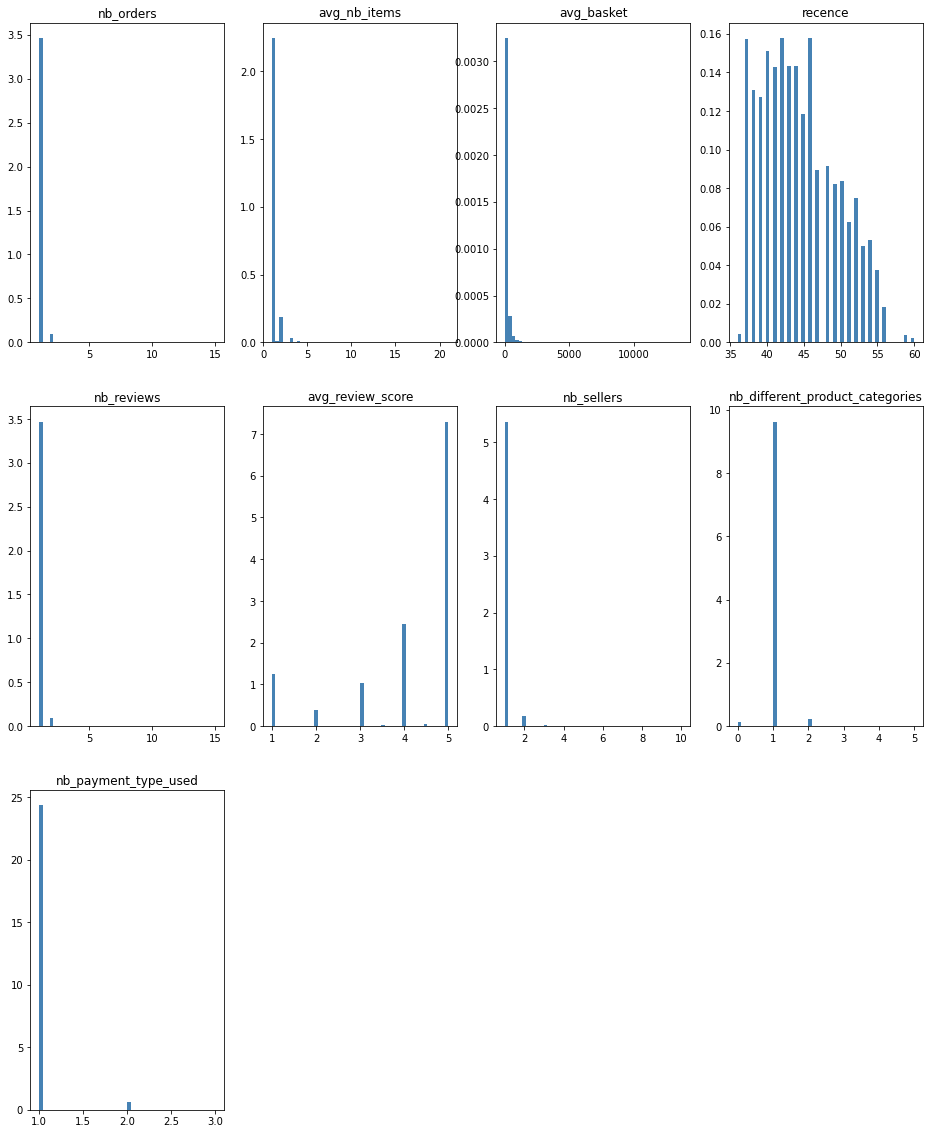

In [77]:
# Visualisation des variables quantitatives
fig = plt.figure(figsize=(16, 20))
for indice_colonne in range(data_quanti_visualisation.shape[1]):
    ax = fig.add_subplot(3, 4, (indice_colonne+1))
    nom_colonne = data_quanti_visualisation.iloc[:, indice_colonne].name
    h = ax.hist(data_quanti_visualisation.iloc[:, indice_colonne], bins=50, color='steelblue', 
                density=True, edgecolor='none')
    ax.set_title(nom_colonne, fontsize=12)

Notes :
- la plupart des données numériques sont asymétrique
- elles n'ont pas le même ordre de grandeur
- la quasi-totalité des clients n'ont fait qu'une seule commande avec un seul produit (donc un seul commentaire ou note)
- la plupart d'entre eux donné une bonne note (4 ou 5)

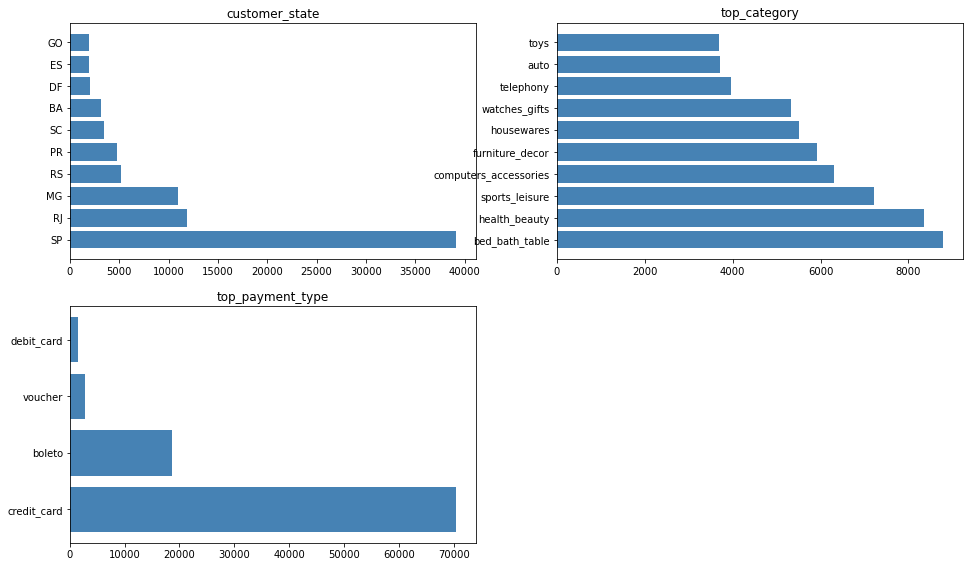

In [78]:
# Visualisation des variables qualitatives
fig = plt.figure(figsize=(16, 20))
for indice_colonne in range(data_quali_visualisation.shape[1]):
    ax = fig.add_subplot(4, 2, (indice_colonne+1))
    nom_colonne = data_quali_visualisation.iloc[:, indice_colonne].name
    stat_variable_quali = pd.DataFrame(data_quali_visualisation.iloc[:, indice_colonne].value_counts().head(10))
    bh = ax.barh(stat_variable_quali.index, stat_variable_quali[nom_colonne], tick_label=stat_variable_quali.index, 
                 color='steelblue', edgecolor='none')
    ax.set_title(nom_colonne, fontsize=12)

In [68]:
aggregats_par_client.customer_state.value_counts()

SP    39149
RJ    11914
MG    10995
RS     5167
PR     4766
SC     3446
BA     3156
DF     2016
ES     1928
GO     1893
PE     1547
CE     1258
PA      922
MT      855
MA      700
MS      680
PB      502
RN      464
PI      464
AL      387
SE      328
TO      267
RO      231
AM      140
AC       76
AP       66
RR       40
Name: customer_state, dtype: int64

La plupart des clients (2/3 environ) ont réalisé leur dernière commande dans les états suivants :
- Sao Paulo
- Rio de Janeiro
- et Minas Gerais

À noter que Sao Paulo et Rio de Janeiro sont les deux plus grandes villes du pays avec respectivement, 12 et 6 millions d'habitants.

Les modalités seront regroupées ainsi :
 - SP & RJ
 - Sud du Brésil avec MG, RS, PR et SC
 - et les autres états

In [82]:
# stockage des états des clients dans des listes pour filtrer plus facilement
liste_etats_clients = aggregats_par_client.customer_state.unique().tolist()
liste_SP_RJ = ["SP", "RJ"]
liste_sud_bresil = ["MG", "RS", "PR", "SC"]
liste_etats_exclusion = liste_sud_bresil + liste_SP_RJ
liste_autres_etats = [etat for etat in liste_etats_clients if etat not in liste_etats_exclusion]

In [92]:
# regroupement des modalités des états dans lequel les clients vivent
aggregats_par_client.loc[aggregats_par_client.customer_state.isin(liste_SP_RJ), 
                         "gathered_customer_state"] = "sao_paulo_and_rio_janeiro"
aggregats_par_client.loc[aggregats_par_client.customer_state.isin(liste_sud_bresil), 
                         "gathered_customer_state"] = "south_brazil_without_sp_rj"
aggregats_par_client.loc[aggregats_par_client.customer_state.isin(liste_autres_etats), 
                         "gathered_customer_state"] = "other_states"

In [98]:
aggregats_par_client.gathered_customer_state.value_counts()

sao_paulo_and_rio_janeiro     51063
south_brazil_without_sp_rj    24374
other_states                  17920
Name: gathered_customer_state, dtype: int64

In [69]:
aggregats_par_client.top_category.value_counts()

bed_bath_table               8796
health_beauty                8358
sports_leisure               7207
computers_accessories        6306
furniture_decor              5907
                             ... 
arts_and_craftmanship          19
cds_dvds_musicals              12
la_cuisine                     11
fashion_childrens_clothes       5
security_and_services           2
Name: top_category, Length: 72, dtype: int64

Au vu du nombre de modalités différentes (72), il y a besoin de les regrouper si j'utilise cette variable. Mais je pense plutôt utiliser la variable avec le nombre de catégories différentes.

In [70]:
aggregats_par_client.top_payment_type.value_counts()

credit_card    70486
boleto         18584
voucher         2845
debit_card      1442
Name: top_payment_type, dtype: int64

La plupart des clients ont davantage recours à la carte bancaire pour réaliser leurs paiements.

### Analyses multivariées

<AxesSubplot:>

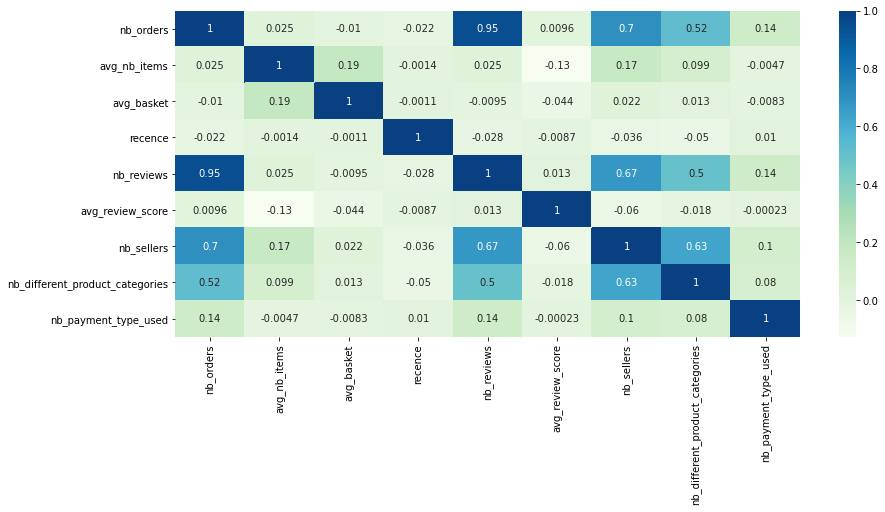

In [99]:
plt.rcParams["figure.figsize"] = (14, 6)
correlations = aggregats_par_client.corr()
sns.heatmap(correlations, cmap="GnBu", annot=True)

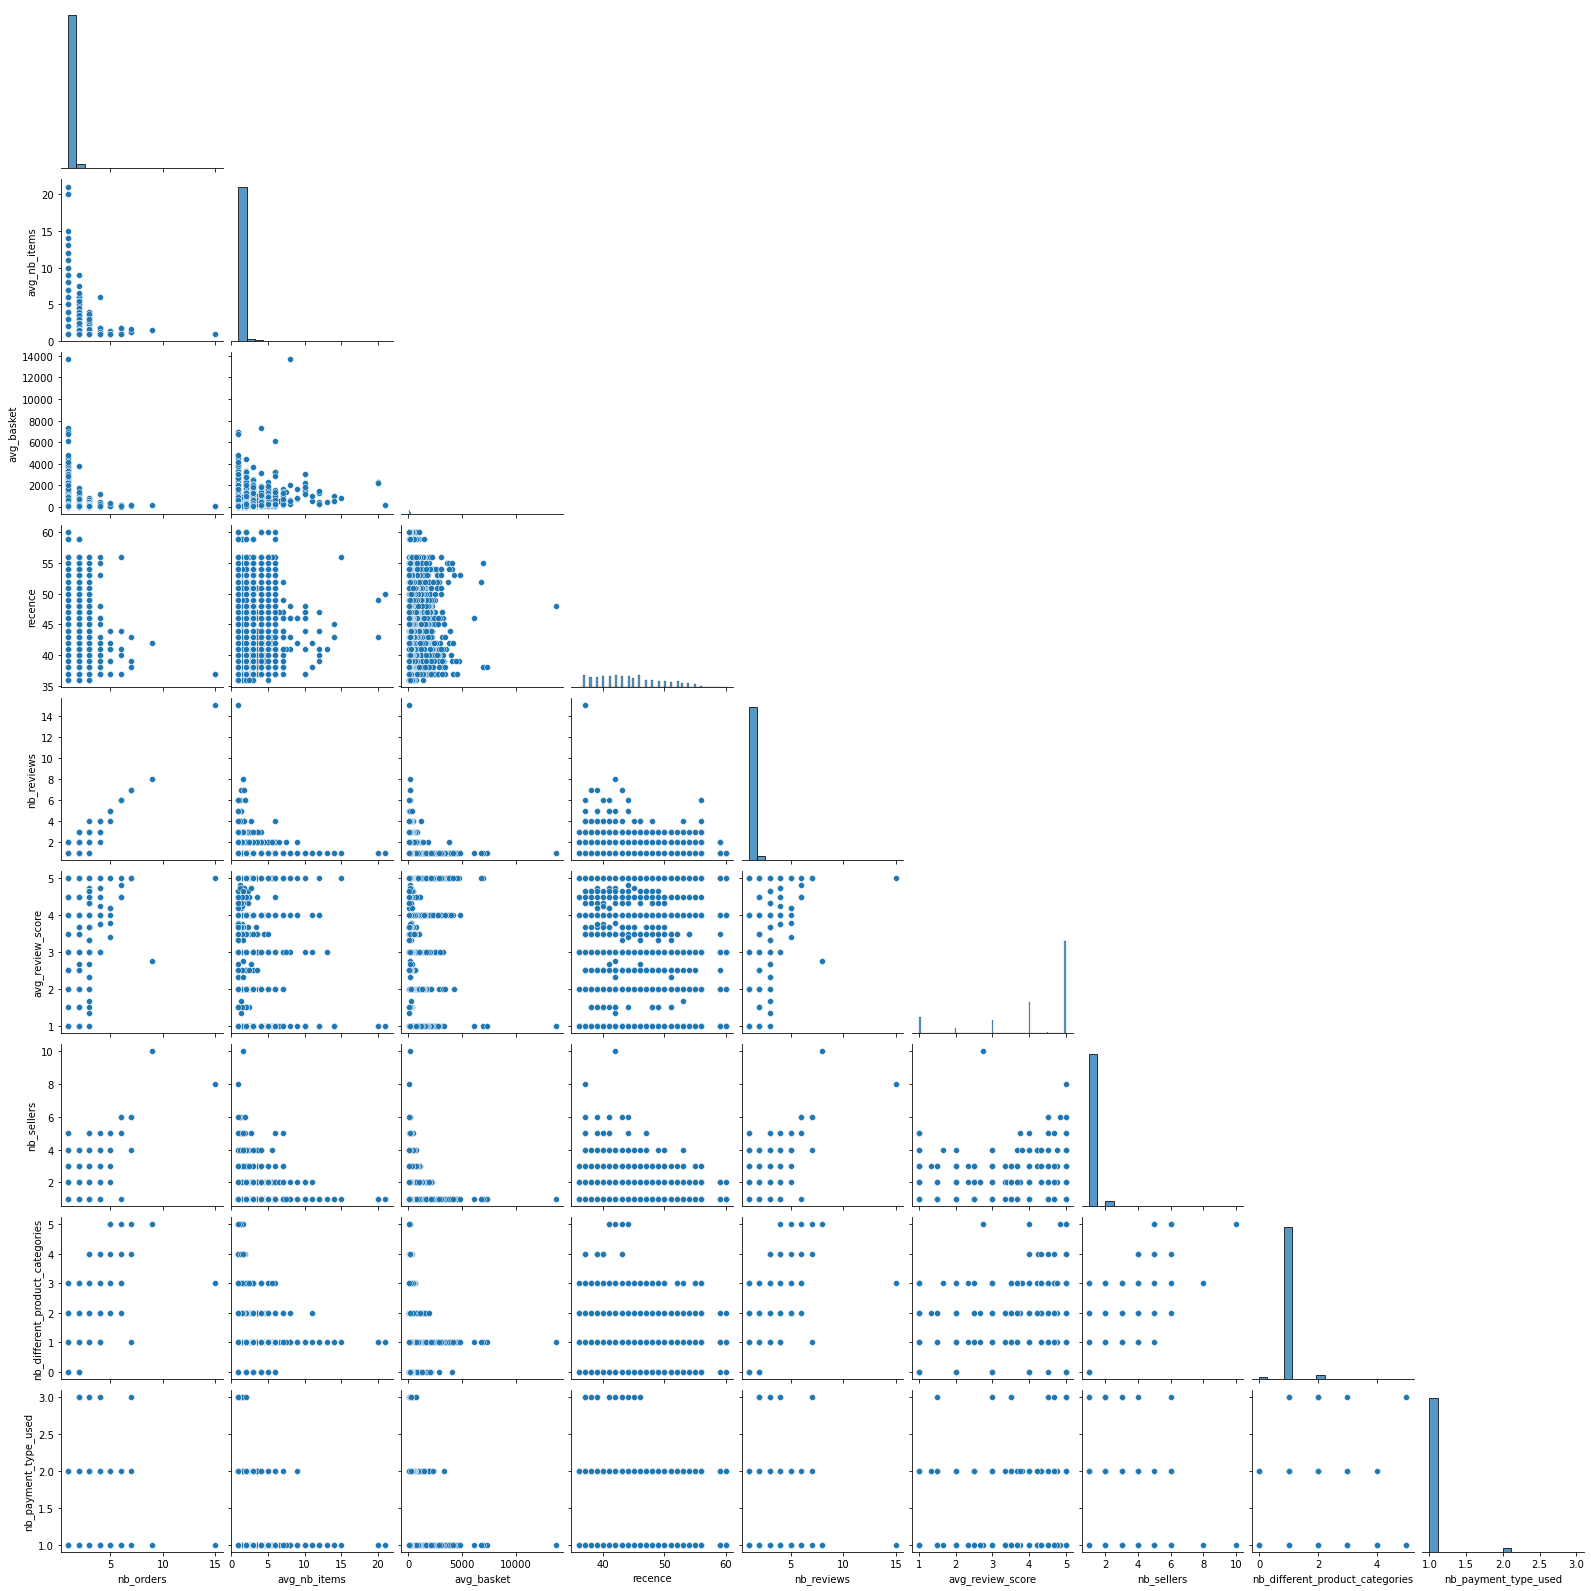

In [100]:
sns.pairplot(aggregats_par_client, height=2.5, corner=True)

On observe les corrélations linéaires suivantes entre :
- le nombre de commandes et le nombre de commentaires laissés par le client
- le nombre de commandes et le nombre de vendeurs dans lequels le client a passé commande
- le nombre de vendeurs dans lequels le client a passé commande et le nombre de commentaires laissés par le client
- le nombre de catégories différentes et le nombre de vendeurs

On note une légère corrélation entre :
- le nombre de catégories différentes et le nombre de commandes
- le nombre de catégories différentes et le nombre de commentaires